# Обнаружение пожаров по фото и видео

## Распознавание пожаров на изображениях

In [1]:
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [2]:
model = load_model('C:/Users/Marinka/Desktop/pract/fire-detection/FireDetection.h5')

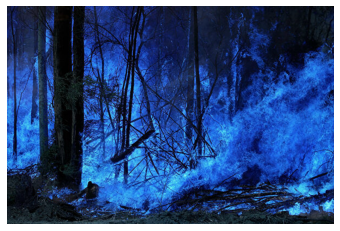

In [3]:
img_path = 'C:/Users/Marinka/Desktop/pract/fire-detection/test/1.jpg' #2.jpg
image = cv2.imread(img_path)
output = image.copy() #копия изображения, на нее потом наложится метка
plt.axis('off') # отключить сетку 
plt.imshow(image)
plt.show()

In [4]:
B, G, R= cv2.split (image)      # получить b, g, r
imgRGB = cv2.merge ([R, G, B])  # переключить на rgb 

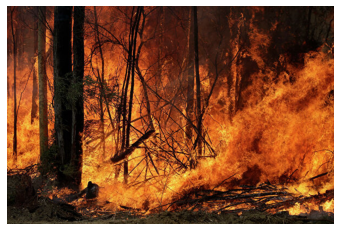

In [5]:
plt.axis('off') # отключить сетку 
plt.imshow(imgRGB)
plt.show()

In [6]:
image = cv2.resize(image, (128, 128))
image = image.astype("float32") / 255.0

In [7]:
CLASSES_NAMES = ["NoFire", "Fire"]

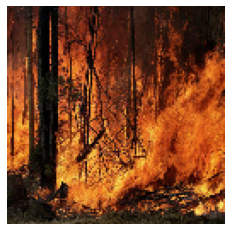

In [8]:
B, G, R= cv2.split (image)      # получить b, g, r
imgRGB = cv2.merge ([R, G, B]) 
plt.axis('off') # отключить сетку 
plt.imshow(imgRGB)
plt.show()

In [9]:
prediction = model.predict(np.expand_dims(image, axis=0))[0]
# делаем метку, у которой наибольшая вероятность
title = np.argmax(prediction)
label = CLASSES_NAMES[title]

In [10]:
import imutils

In [11]:
text = label if label == "NoFire" else "Fire"
output = imutils.resize(output, width=500)
cv2.putText(output, text, (20, 50), cv2.FONT_HERSHEY_SIMPLEX,
     1.25, (35, 235, 35), 3)

array([[[20, 26, 48],
        [23, 25, 58],
        [17, 26, 39],
        ...,
        [ 6, 13, 14],
        [ 7, 11, 13],
        [ 3,  7,  8]],

       [[25, 31, 54],
        [26, 28, 62],
        [19, 27, 43],
        ...,
        [ 4,  9, 16],
        [ 2,  5, 12],
        [ 3,  6, 13]],

       [[23, 30, 52],
        [23, 26, 61],
        [17, 25, 45],
        ...,
        [ 7, 12, 24],
        [ 0,  3, 17],
        [ 4,  7, 22]],

       ...,

       [[39, 62, 68],
        [38, 61, 67],
        [27, 49, 55],
        ...,
        [ 1, 11, 13],
        [ 5, 15, 19],
        [ 8, 18, 22]],

       [[26, 46, 53],
        [30, 50, 57],
        [28, 47, 54],
        ...,
        [ 6, 15, 14],
        [ 7, 15, 15],
        [ 6, 14, 13]],

       [[24, 42, 49],
        [21, 39, 46],
        [29, 46, 53],
        ...,
        [17, 22, 25],
        [18, 24, 26],
        [13, 18, 18]]], dtype=uint8)

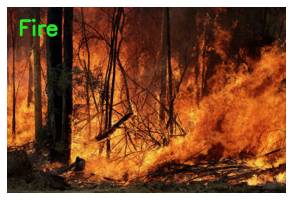

In [12]:
B, G, R= cv2.split (output)        # получить b, g, r
imgRGB = cv2.merge ([R, G, B]) 
plt.figure(figsize=(5,5))
plt.axis('off') # отключить сетку 
plt.imshow(imgRGB)
plt.show()

In [45]:
#Чтобы сохранить изображение используем функцию cv2.imwrite ()
cv2.imwrite ('C:/Users/Marinka/Desktop/pract/fire-detection/testfire.png',output)

True

## Видео

In [62]:
video_path = 'C:/Users/Marinka/Desktop/pract/fire-detection/video/nofire.mp4' # fire1.mp4 fire2.mp4 nofire.mp4

### с мерцанием

In [64]:
video = cv2.VideoCapture(video_path)
writer = None
(W, H) = (None, None)
# зацикливание кадров из потока видеофайла
while True:
    (grabbed, frame) = video.read()
 
    # если кадр не захватился, это обозначает, что мы дошли до конца
    if not grabbed:
        break

    if W is None or H is None:
        (H, W) = frame.shape[:2]

    # копия
    output = frame.copy()
    # преобразовать из BGR в RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # изменить размер кадра до 128x128
    frame = cv2.resize(frame, (128, 128))
    frame = frame.astype("float32")
    
    # прогнозы
    prediction = model.predict(np.expand_dims(frame, axis=0))[0]
#     Q.append(prediction)


#    делаем метку, у которой наибольшая вероятность
    title = np.argmax(prediction)  
    label = CLASSES_NAMES[title]

#      # выполнить усреднение прогрноза по текущей истории предыдущих прогнозов
#     results = np.array(Q).mean(axis=0)
#     title = np.argmax(results)
#     label = CLASSES_NAMES[title]

    # создаем надпись
#     text = "{}".format(label)
    text = label if label == "NoFire" else "Fire"
    cv2.putText(output, text, (20, 50), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (35, 255, 35), 3)

    if writer is None:
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter('C:/Users/Marinka/Desktop/pract/fire-detection/nofire_detect_flicker.avi', fourcc, 30,
            (W, H), True)

    writer.write(output)
    
writer.release()
video.release()

## без мерцания, усреднение прогноза

In [57]:
video_path = 'C:/Users/Marinka/Desktop/pract/fire-detection/video/nofire.mp4' # fire1.mp4 fire2.mp4 nofire.mp4

In [58]:
from collections import deque
# инициализировать очередь прогнозов
Q = deque([120])#размер очереди для усреднения

In [65]:
video = cv2.VideoCapture(video_path)
writer = None
(W, H) = (None, None)
# зацикливание кадров из потока видеофайла
while True:
    # читать следующий кадр из файла
    (grabbed, frame) = video.read()
 
    # если кадр не захватился, это обозначает, что мы дошли до конца
    if not grabbed:
        break
 
    # if the frame dimensions are empty, grab them
    if W is None or H is None:
        (H, W) = frame.shape[:2]

    # копия
    output = frame.copy()
    # преобразовать из BGR в RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # изменить размер кадра до 128x128
    frame = cv2.resize(frame, (128, 128))
    frame = frame.astype("float32")
    
    # прогнозы
    prediction = model.predict(np.expand_dims(frame, axis=0))[0]
    Q.append(prediction)


   # делаем метку, у которой наибольшая вероятность
#     title = np.argmax(prediction)  
#     label = CLASSES_NAMES[title]

     # выполнить усреднение прогрноза по текущей истории предыдущих прогнозов
    results = np.array(Q).mean(axis=0)
    title = np.argmax(results)
    label = CLASSES_NAMES[title]

    # создаем надпись
#     text = "{}".format(label)
    text = label if label == "NoFire" else "Fire"
    cv2.putText(output, text, (20, 50), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (35, 255, 35), 3)

    if writer is None:
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter('C:/Users/Marinka/Desktop/pract/fire-detection/nofire_detect.avi', fourcc, 30,
            (W, H), True)

    writer.write(output)
    
writer.release()
video.release()